# 1. Построение графиков в Matplotlib

----------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Магическая команда Jupyter Notebook, используется для того,
# чтобы график строился не в отдельном окне, а в ноубуке с кодом
%matplotlib inline

In [3]:
%%time  
for i in range(1000):
  pass

CPU times: user 75 µs, sys: 7 µs, total: 82 µs
Wall time: 88 µs


### Построение диаграмм

In [9]:
x = [1, 2, 3, 4, 5, 6]
y = [0, 1, 4, 9, 16, 25]

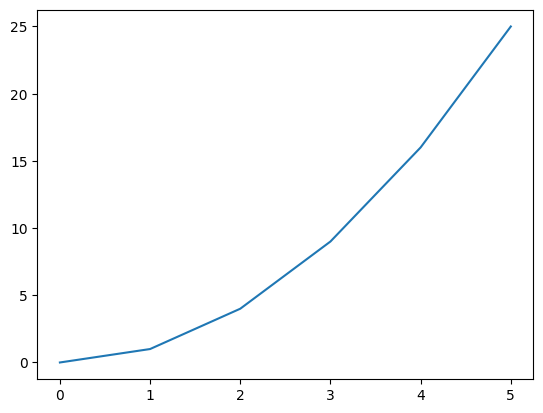

In [7]:
# Линейная диаграмма (график)
plt.plot(y) # Функция для построения

plt.show() # Функция для вывода графика

# Если предать 1 значение, то функция их расположит по вертикальной оси,
# а по горизонтальной оси расположит порядковые номера, начиная с 0, с шагом 1

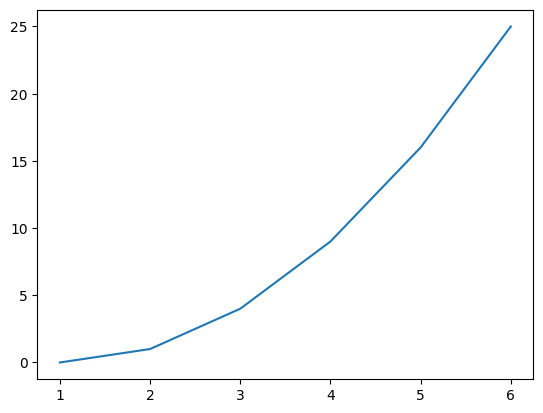

In [10]:
plt.plot(x, y)

plt.show()

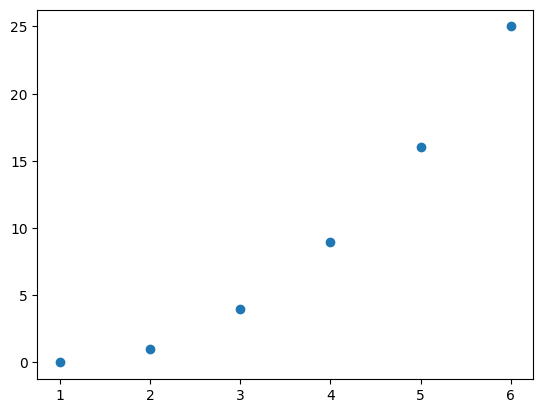

In [13]:
# Точечная диаграмма (диаграмма разброса)
plt.scatter(x, y)

plt.show()

### Логарифмический масштаб

In [15]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
masses = [0.055274, 0.815, 1.0, 0.107, 317.8, 95.0, 14.6, 17.147] # Масса планет Солнечной системы по отношению к Земле

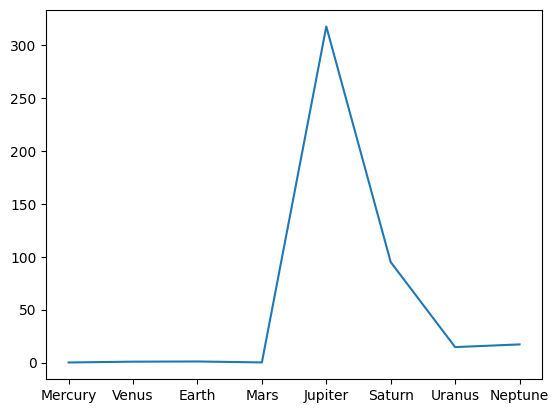

In [16]:
# Без применения логарифмического масштаба (линейный масштаб)
plt.plot(planets, masses)

plt.show()

In [17]:
masses[planets.index('Earth')] / masses[planets.index('Mercury')]

18.091688678221225

Хоть масса земли и меркурия различается в 18 раз, на линейном масштабе это не видно.

Применим логарифмический масштаб

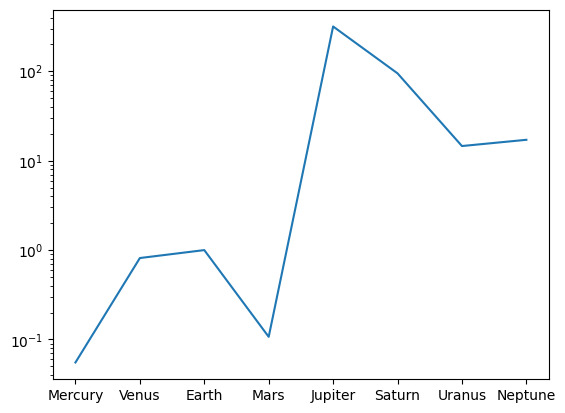

In [18]:
# Логарифмический масштаб на вертикальной оси
plt.plot(planets, masses)
plt.yscale(value='log')

plt.show()

Создадим на основе двух списков Series

In [20]:
planet_info = pd.Series(masses, index=planets)
planet_info

Mercury      0.055274
Venus        0.815000
Earth        1.000000
Mars         0.107000
Jupiter    317.800000
Saturn      95.000000
Uranus      14.600000
Neptune     17.147000
dtype: float64

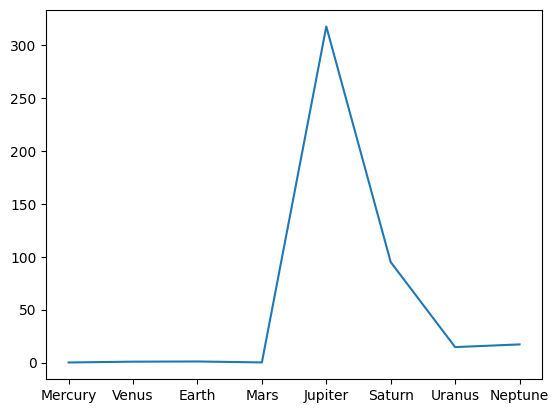

In [22]:
# Линейная диаграмма из Series
# plt.plot(planets, masses)
planet_info.plot()

plt.show()

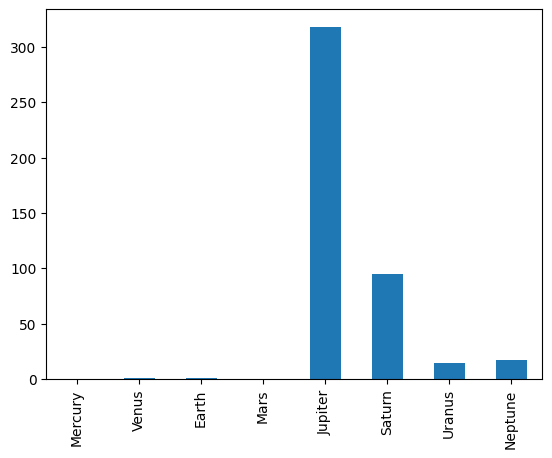

In [23]:
# Столбчатая диаграмма (kind='bar')
planet_info.plot(kind='bar') 

plt.show()

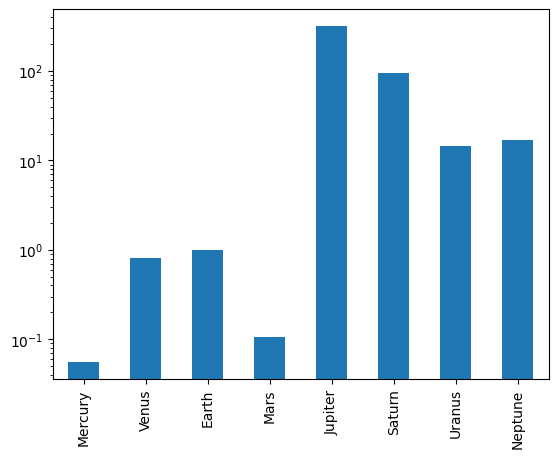

In [27]:
# logy=True - применит логарифмический масштаб к вертикальной оси (к той оси, на которой расположен данные о массе планет)
planet_info.plot(kind='bar', logy=True)

plt.show()

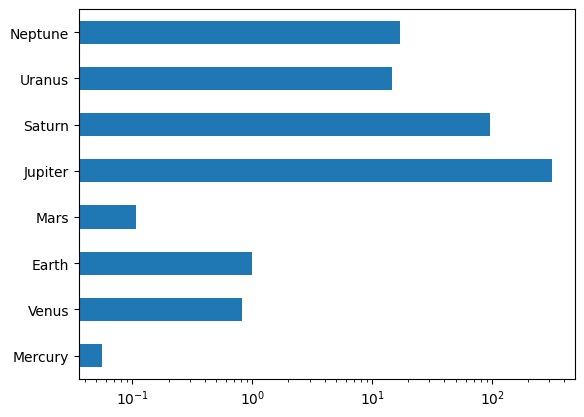

In [ ]:
# kind='barh' - гризонтальное расположение столбцов
# logx=True - логарифмический масштаб для горизонтальной оси
planet_info.plot(kind='barh', logx=True)

plt.show()

### Построение гистограмм

Благодоря гистограммам, можно наглядно изобразить каким образом распределена некоторая величина в выборке

In [38]:
a = [i for i in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

(array([5., 5.]), array([0. , 4.5, 9. ]), <BarContainer object of 2 artists>)


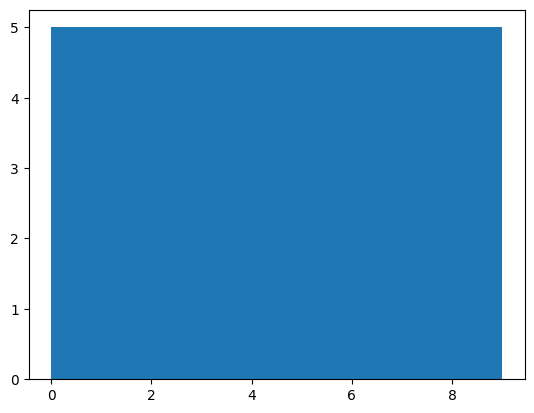

In [39]:
# plt.hist - построение гистограммы
# bins=3 - это число промежутков (количество бинов на которое будет разбита ось со значениями этих чисел)
# По умолчанию bins = 10
hist_info = plt.hist(a, bins=2)
# Записываем информацию о гистограмме в hist_info, чтобы увидеть сколько элементов списка попало в каждый бин
print(hist_info)

plt.show()

Если столбцы гистограммы расположенны вертикально (по умолчанию), то по горизонтальной оси будут распологаться значения из того списка чисел, который мы создали, а по вертикали, количество чисел в промежутке на которые разбита горизонтальная ось (число этих промежутков мы выбираем сами).

In [40]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

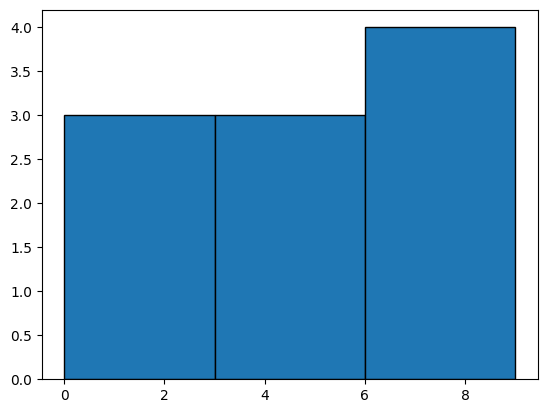

In [41]:
# Как мы видим, что прямоугольники сливаются воедино
# edgecolor='black' - Задать цвет границам
plt.hist(a, bins=3, edgecolor='black')

plt.show()

(array([3., 3., 4.]),
 array([0., 3., 6., 9.]),
 <BarContainer object of 3 artists>)

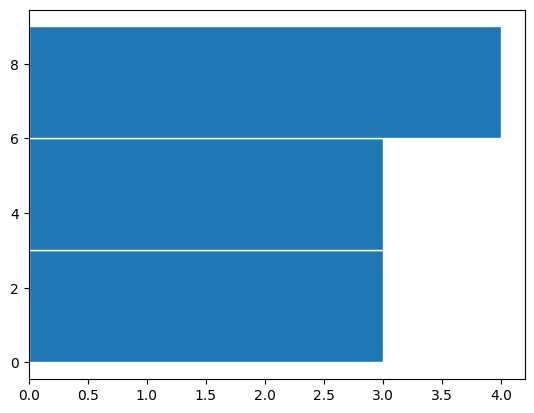

In [ ]:
# ec - синоним edgecolor
# orientation='horizontal' - прямоугольники распологаются горизонтально
plt.hist(a, bins=3, orientation='horizontal', ec='white')

**Нормальное распределение**

In [54]:
mu, sigma = 170, 10 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)

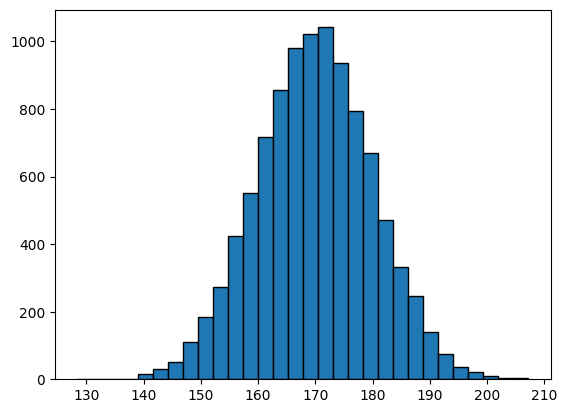

In [55]:
plt.hist(s, bins=30, edgecolor='black')
plt.show()

### Визуализация данных на примере индекса Биг-Мака

Индекс Биг-Мака - неофициальный способ определения паритета покупательной способности

In [62]:
# Данные с сайта журнала The Economist за январь 2018 года
url='http://infographics.economist.com/2018/databank/BMFile2000toJan2018.xls'

In [63]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
# pd.read_html("https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html")

In [64]:
# С помощью функци read_excel можно читать данные не только из файлов на компьютере,
# но и с веб-сервера по ссылке
bmi = pd.read_excel(url, storage_options={'User-Agent': 'Mozilla/5.0'})

In [68]:
# Информация о полученном DataFrame
bmi.shape

(57, 11)

In [69]:
bmi.columns

Index(['Country', 'local_price', 'dollar_ex', 'dollar_price', 'dollar_ppp',
       'dollar_valuation', 'dollar_adj_valuation', 'euro_adj_valuation',
       'sterling_adj_valuation', 'yen_adj_valuation', 'yuan_adj_valuation'],
      dtype='object')

In [70]:
bmi.head()

Country  local_price  dollar_ex  dollar_price  dollar_ppp  \
0  Argentina        75.00  18.937500      3.960396   14.204545   
1  Australia         5.90   1.253683      4.706135    1.117424   
2     Brazil        16.50   3.227900      5.111683    3.125000   
3    Britain         3.19   0.722857      4.413046    0.604167   
4     Canada         6.55   1.245900      5.257244    1.240530   

   dollar_valuation  dollar_adj_valuation  euro_adj_valuation  \
0        -24.992499             18.650590            5.870471   
1        -10.868655             -6.388069          -16.471218   
2         -3.187831             60.962604           43.624964   
3        -16.419583             -2.455560          -12.962289   
4         -0.430989             13.847882            1.585073   

   sterling_adj_valuation  yen_adj_valuation  yuan_adj_valuation  
0               21.637471          54.674121           17.830085  
1               -4.031504          22.033470           -7.035424  
2               65.014638         109.832495           59.849499  
3                0.000000          27.159928           -3.130110  
4               16.713862          48.413262           13.060589

In [73]:
bmi["Country"]

0          Argentina
1          Australia
2             Brazil
3            Britain
4             Canada
5              Chile
6              China
7           Colombia
8         Costa Rica
9     Czech Republic
10           Denmark
11             Egypt
12         Euro area
13         Hong Kong
14           Hungary
15             India
16         Indonesia
17            Israel
18             Japan
19            Latvia
20         Lithuania
21          Malaysia
22            Mexico
23       New Zealand
24            Norway
25          Pakistan
26              Peru
27       Philippines
28            Poland
29            Russia
30      Saudi Arabia
31         Singapore
32      South Africa
33       South Korea
34         Sri Lanka
35            Sweden
36       Switzerland
37            Taiwan
38          Thailand
39            Turkey
40               UAE
41           Ukraine
42     United States
43           Uruguay
44           Vietnam
45           Austria
46           Belgium
47           

In [82]:
bmi.iloc[1:10, 3]

1    4.706135
2    5.111683
3    4.413046
4    5.257244
5    4.290889
6    3.171642
7    3.832468
8    4.027932
9    3.807779
Name: dollar_price, dtype: float64

In [ ]:
bmi.iloc[1:10, 3:5]

In [ ]:
bmi.iloc[:, :4].head(10)

Country  local_price    dollar_ex  dollar_price
0       Argentina        75.00    18.937500      3.960396
1       Australia         5.90     1.253683      4.706135
2          Brazil        16.50     3.227900      5.111683
3         Britain         3.19     0.722857      4.413046
4          Canada         6.55     1.245900      5.257244
5           Chile      2600.00   605.935000      4.290889
6           China        20.40     6.432000      3.171642
7        Colombia     10900.00  2844.120000      3.832468
8      Costa Rica      2290.00   568.530000      4.027932
9  Czech Republic        79.00    20.747000      3.807779

In [86]:
bmi

Country  local_price     dollar_ex  dollar_price    dollar_ppp  \
0        Argentina        75.00     18.937500      3.960396     14.204545   
1        Australia         5.90      1.253683      4.706135      1.117424   
2           Brazil        16.50      3.227900      5.111683      3.125000   
3          Britain         3.19      0.722857      4.413046      0.604167   
4           Canada         6.55      1.245900      5.257244      1.240530   
5            Chile      2600.00    605.935000      4.290889    492.424242   
6            China        20.40      6.432000      3.171642      3.863636   
7         Colombia     10900.00   2844.120000      3.832468   2064.393939   
8       Costa Rica      2290.00    568.530000      4.027932    433.712121   
9   Czech Republic        79.00     20.747000      3.807779     14.962121   
10         Denmark        30.00      6.082700      4.932020      5.681818   
11           Egypt        34.21     17.700000      1.932768      6.479167   
12       Euro area         3.95      0.816827      4.835788      0.748106   
13       Hong Kong        20.50      7.819000      2.621819      3.882576   
14         Hungary       864.00    252.142150      3.426639    163.636364   
15           India       180.00     63.861250      2.818611     34.090909   
16       Indonesia     35750.00  13359.000000      2.676099   6770.833333   
17          Israel        16.50      3.436350      4.801606      3.125000   
18           Japan       380.00    110.725000      3.431926     71.969697   
19          Latvia         2.70      0.816827      3.305475      0.511364   
20       Lithuania         2.80      0.816827      3.427900      0.530303   
21        Malaysia         9.00      3.954000      2.276176      1.704545   
22          Mexico        48.00     18.663500      2.571865      9.090909   
23     New Zealand         6.20      1.374665      4.510190      1.174242   
24          Norway        49.00      7.850100      6.241959      9.280303   
25        Pakistan       375.00    110.505000      3.393512     71.022727   
26            Peru        10.50      3.212000      3.268991      1.988636   
27     Philippines       134.00     50.725000      2.641695     25.378788   
28          Poland        10.10      3.405750      2.965573      1.912879   
29          Russia       130.00     56.745000      2.290951     24.621212   
30    Saudi Arabia        12.00      3.750300      3.199744      2.272727   
31       Singapore         5.80      1.322550      4.385467      1.098485   
32    South Africa        30.00     12.258150      2.447351      5.681818   
33     South Korea      4400.00   1069.250000      4.115034    833.333333   
34       Sri Lanka       580.00    153.800000      3.771131    109.848485   
35          Sweden        49.10      8.018800      6.123111      9.299242   
36     Switzerland         6.50      0.960850      6.764844      1.231061   
37          Taiwan        69.00     29.553000      2.334788     13.068182   
38        Thailand       119.00     31.950000      3.724570     22.537879   
39          Turkey        10.75      3.802600      2.827013      2.035985   
40             UAE        14.00      3.673000      3.811598      2.651515   
41         Ukraine        47.00     28.715000      1.636775      8.901515   
42   United States         5.28      1.000000      5.280000      1.000000   
43         Uruguay       140.00     28.580000      4.898530     26.515152   
44         Vietnam     65000.00  22711.500000      2.861986  12310.606061   
45         Austria         3.40      0.816827      4.162450      0.643939   
46         Belgium         4.10      0.816827      5.019425      0.776515   
47         Estonia         3.15      0.816827      3.856388      0.596591   
48         Finland         4.56      0.816827      5.582580      0.863636   
49          France         4.20      0.816827      5.141850      0.795455   
50         Germany         3.90      0.816827      4.774575      0.738636   
51     

In [87]:
bmi.set_index('Country')

local_price     dollar_ex  dollar_price    dollar_ppp  \
Country                                                                 
Argentina             75.00     18.937500      3.960396     14.204545   
Australia              5.90      1.253683      4.706135      1.117424   
Brazil                16.50      3.227900      5.111683      3.125000   
Britain                3.19      0.722857      4.413046      0.604167   
Canada                 6.55      1.245900      5.257244      1.240530   
Chile               2600.00    605.935000      4.290889    492.424242   
China                 20.40      6.432000      3.171642      3.863636   
Colombia           10900.00   2844.120000      3.832468   2064.393939   
Costa Rica          2290.00    568.530000      4.027932    433.712121   
Czech Republic        79.00     20.747000      3.807779     14.962121   
Denmark               30.00      6.082700      4.932020      5.681818   
Egypt                 34.21     17.700000      1.932768      6.479167   
Euro area              3.95      0.816827      4.835788      0.748106   
Hong Kong             20.50      7.819000      2.621819      3.882576   
Hungary              864.00    252.142150      3.426639    163.636364   
India                180.00     63.861250      2.818611     34.090909   
Indonesia          35750.00  13359.000000      2.676099   6770.833333   
Israel                16.50      3.436350      4.801606      3.125000   
Japan                380.00    110.725000      3.431926     71.969697   
Latvia                 2.70      0.816827      3.305475      0.511364   
Lithuania              2.80      0.816827      3.427900      0.530303   
Malaysia               9.00      3.954000      2.276176      1.704545   
Mexico                48.00     18.663500      2.571865      9.090909   
New Zealand            6.20      1.374665      4.510190      1.174242   
Norway                49.00      7.850100      6.241959      9.280303   
Pakistan             375.00    110.505000      3.393512     71.022727   
Peru                  10.50      3.212000      3.268991      1.988636   
Philippines          134.00     50.725000      2.641695     25.378788   
Poland                10.10      3.405750      2.965573      1.912879   
Russia               130.00     56.745000      2.290951     24.621212   
Saudi Arabia          12.00      3.750300      3.199744      2.272727   
Singapore              5.80      1.322550      4.385467      1.098485   
South Africa          30.00     12.258150      2.447351      5.681818   
South Korea         4400.00   1069.250000      4.115034    833.333333   
Sri Lanka            580.00    153.800000      3.771131    109.848485   
Sweden                49.10      8.018800      6.123111      9.299242   
Switzerland            6.50      0.960850      6.764844      1.231061   
Taiwan                69.00     29.553000      2.334788     13.068182   
Thailand             119.00     31.950000      3.724570     22.537879   
Turkey                10.75      3.802600      2.827013      2.035985   
UAE                   14.00      3.673000      3.811598      2.651515   
Ukraine               47.00     28.715000      1.636775      8.901515   
United States          5.28      1.000000      5.280000      1.000000   
Uruguay              140.00     28.580000      4.898530     26.515152   
Vietnam            65000.00  22711.500000      2.861986  12310.606061   
Austria                3.40      0.816827      4.162450      0.643939   
Belgium                4.10      0.816827      5.019425      0.776515   
Estonia                3.15      0.816827      3.856388      0.596591   
Finland                4.56      0.816827      5.582580      0.863636   
France                 4.20      0.816827      5.141850      0.795455   
Germany                3.90      0.816827      4.774575      0.738636   
Greece                 3.35      0.816827      4.101237      0.634470   
Ireland                4.07      0.816827      4.982698      0.770833   
I

In [89]:
bmi['dollar_price']

0     3.960396
1     4.706135
2     5.111683
3     4.413046
4     5.257244
5     4.290889
6     3.171642
7     3.832468
8     4.027932
9     3.807779
10    4.932020
11    1.932768
12    4.835788
13    2.621819
14    3.426639
15    2.818611
16    2.676099
17    4.801606
18    3.431926
19    3.305475
20    3.427900
21    2.276176
22    2.571865
23    4.510190
24    6.241959
25    3.393512
26    3.268991
27    2.641695
28    2.965573
29    2.290951
30    3.199744
31    4.385467
32    2.447351
33    4.115034
34    3.771131
35    6.123111
36    6.764844
37    2.334788
38    3.724570
39    2.827013
40    3.811598
41    1.636775
42    5.280000
43    4.898530
44    2.861986
45    4.162450
46    5.019425
47    3.856388
48    5.582580
49    5.141850
50    4.774575
51    4.101237
52    4.982698
53    5.141850
54    4.541968
55    3.917600
56    4.835788
Name: dollar_price, dtype: float64

In [88]:
bmi.set_index('Country')['dollar_price']

Country
Argentina         3.960396
Australia         4.706135
Brazil            5.111683
Britain           4.413046
Canada            5.257244
Chile             4.290889
China             3.171642
Colombia          3.832468
Costa Rica        4.027932
Czech Republic    3.807779
Denmark           4.932020
Egypt             1.932768
Euro area         4.835788
Hong Kong         2.621819
Hungary           3.426639
India             2.818611
Indonesia         2.676099
Israel            4.801606
Japan             3.431926
Latvia            3.305475
Lithuania         3.427900
Malaysia          2.276176
Mexico            2.571865
New Zealand       4.510190
Norway            6.241959
Pakistan          3.393512
Peru              3.268991
Philippines       2.641695
Poland            2.965573
Russia            2.290951
Saudi Arabia      3.199744
Singapore         4.385467
South Africa      2.447351
South Korea       4.115034
Sri Lanka         3.771131
Sweden            6.123111
Switzerland       6.

In [85]:
# Получаем Series из DataFrame, где в качестве индекса выступает название страны (Country),
# а в качестве данныъ, цена Биг-Мака в долларах (dollar_price)
bm_price_series = bmi.set_index('Country')['dollar_price']
bm_price_series.head()

Country
Argentina    3.960396
Australia    4.706135
Brazil       5.111683
Britain      4.413046
Canada       5.257244
Name: dollar_price, dtype: float64

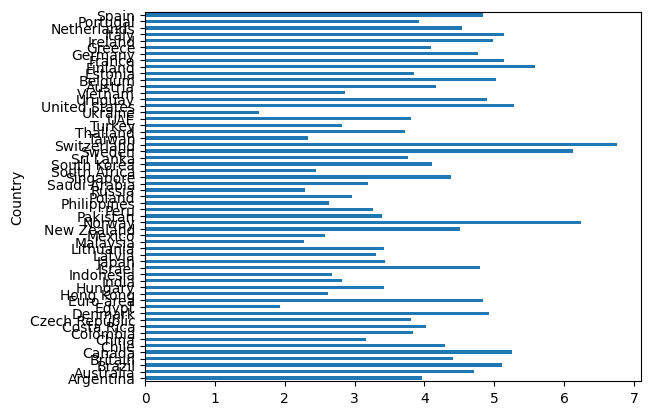

In [90]:
# Построим столбчатую диаграмму расположенную горизонтально
bm_price_series.plot(kind='barh')
plt.show()

Результат получился не читабельным, увеличи масштаб.

In [91]:
# Используем объект rcParams, для увиличения масштаба отображения графики
from pylab import rcParams

# Размеры 9 - ширина 12- выстота в дюймах
rcParams['figure.figsize'] = 9, 12

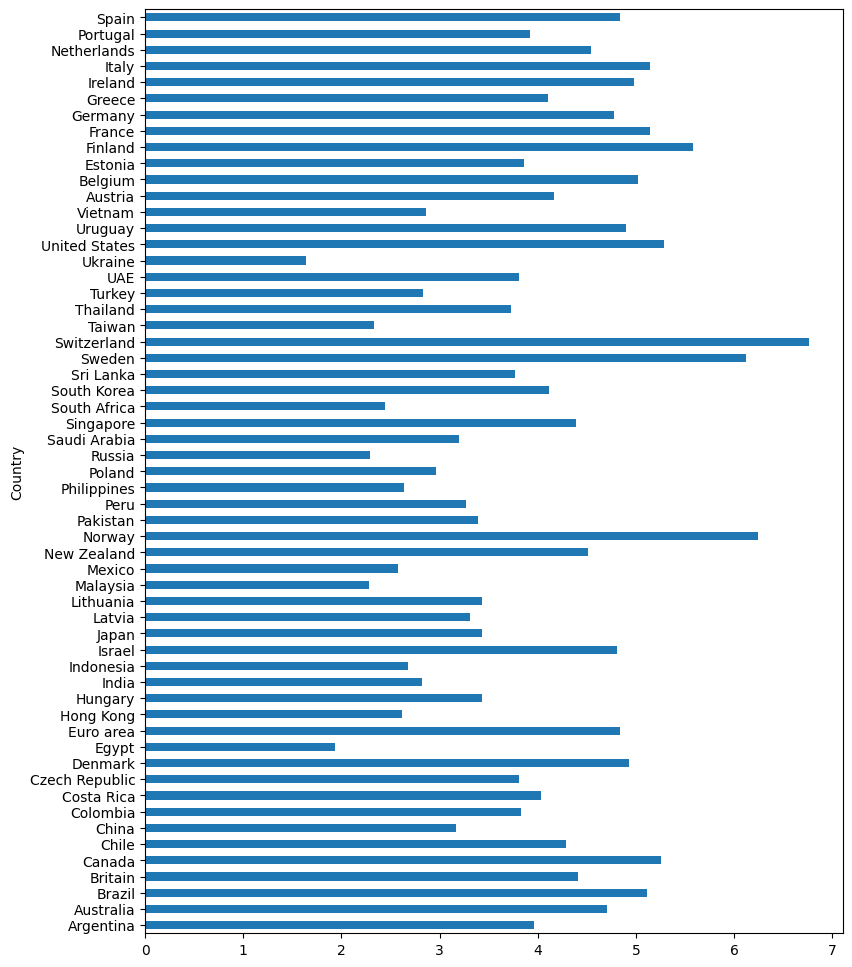

In [92]:
bm_price_series.plot(kind='barh')

plt.show()

На графике хорошо видно название стран, но значения не отсортированы.

Отсортируем значения по цене Биг-Мака

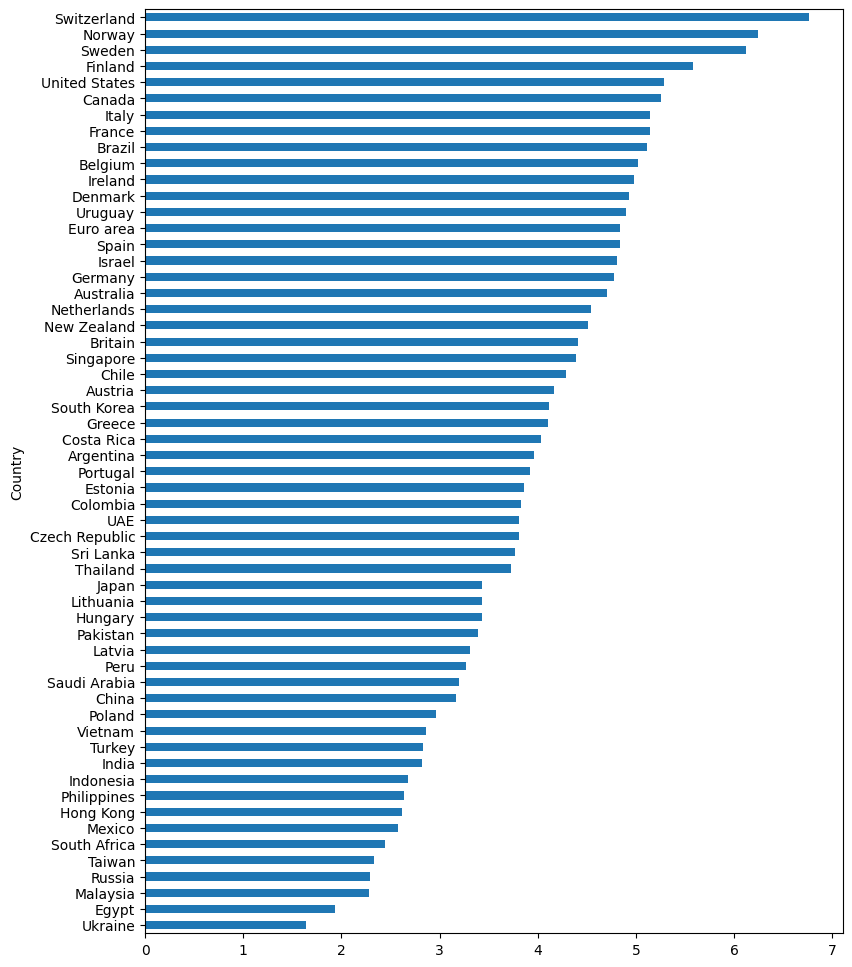

In [95]:
# Сортировка по значеню
bm_price_series.sort_values().plot(kind='barh')

plt.show()

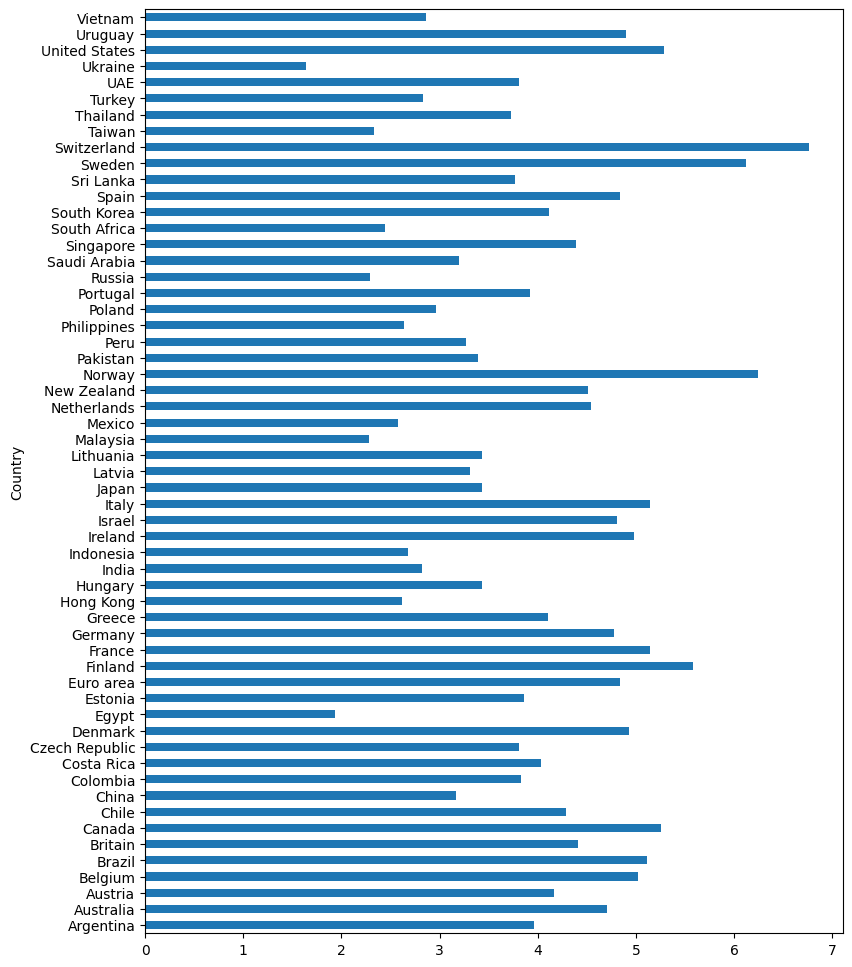

In [96]:
# Сортировка по индексу (Получим расположение стран в алфавитном порядке)
bm_price_series.sort_index().plot(kind='barh')

plt.show()

Сортировка стран получилась в убывающем порядке, его можно изменить, 
задав ascending=False

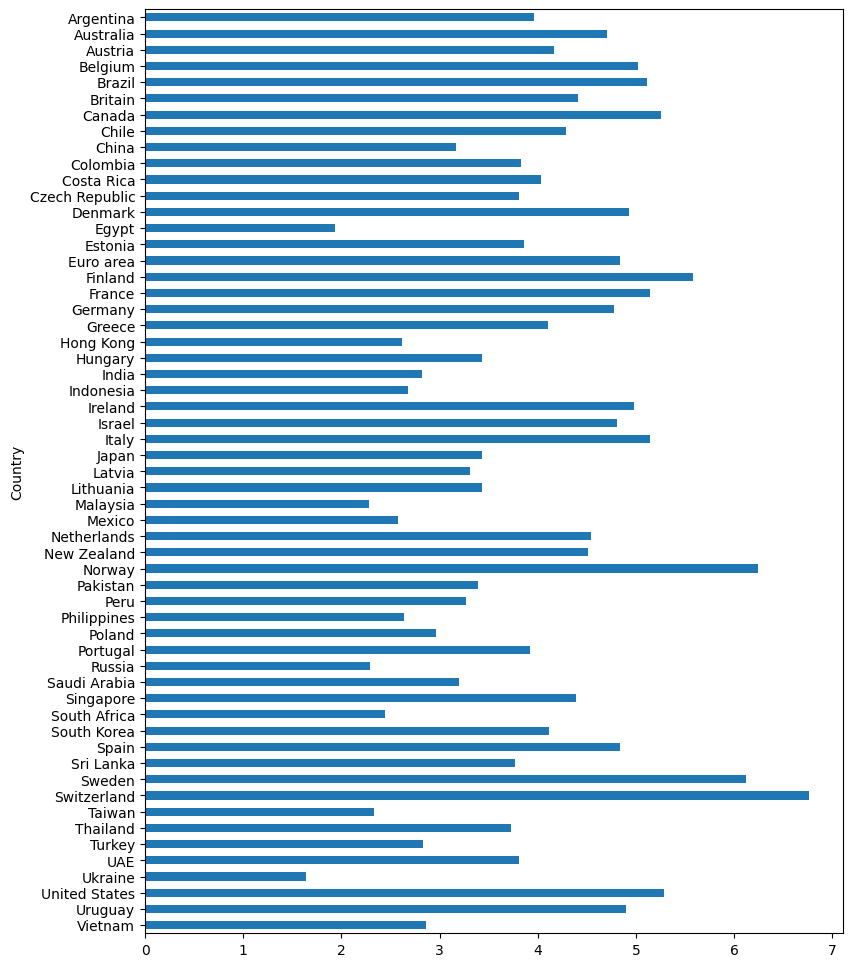

In [97]:
bm_price_series.sort_index(ascending=False).plot(kind='barh')

plt.show()

Построим гистограмму, чтобы получить представление о том
как распределены цены

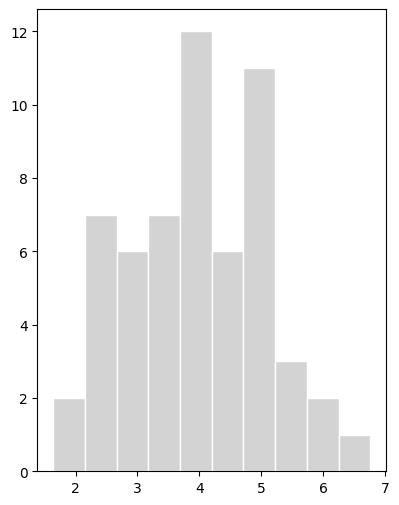

In [99]:
# Уменьшим размер графика с помощью rcParams
rcParams['figure.figsize'] = 4.5, 6

# Построим гистограмму
# color='lightgrey' - Цвет гистограммы
plt.hist(bm_price_series, ec='white', color='lightgrey')

plt.show()
# По умолчанию у нас будет 10 бинов

### Сохранение графиков в файл

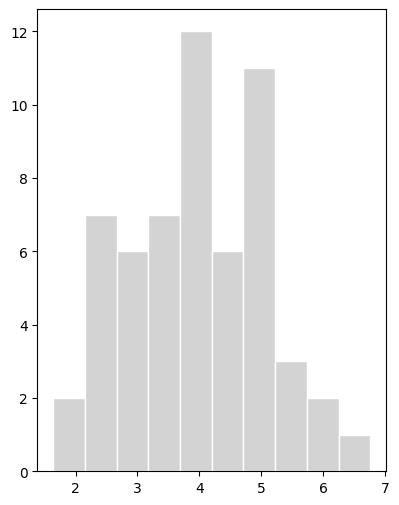

In [105]:
plt.hist(bm_price_series, ec='white', color='lightgrey')

# Сохраним гистограмму с помощью функции savefig
# 'img/BM_price' - Нзвание файла или путь к нему 
# fmt='png' - Формат файла

plt.savefig('BM_price.jpeg', format='jpeg')
plt.show()

-------------

# 2. Выведение дополнительной информации на график

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# Установим необходимые размеры графика
rcParams['figure.figsize'] = 6, 4.5

### Форматирование текста для графика

In [107]:
x = np.linspace(-5, 5, 101)
x

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

In [108]:
x2 = x**2
x2

array([2.500e+01, 2.401e+01, 2.304e+01, 2.209e+01, 2.116e+01, 2.025e+01,
       1.936e+01, 1.849e+01, 1.764e+01, 1.681e+01, 1.600e+01, 1.521e+01,
       1.444e+01, 1.369e+01, 1.296e+01, 1.225e+01, 1.156e+01, 1.089e+01,
       1.024e+01, 9.610e+00, 9.000e+00, 8.410e+00, 7.840e+00, 7.290e+00,
       6.760e+00, 6.250e+00, 5.760e+00, 5.290e+00, 4.840e+00, 4.410e+00,
       4.000e+00, 3.610e+00, 3.240e+00, 2.890e+00, 2.560e+00, 2.250e+00,
       1.960e+00, 1.690e+00, 1.440e+00, 1.210e+00, 1.000e+00, 8.100e-01,
       6.400e-01, 4.900e-01, 3.600e-01, 2.500e-01, 1.600e-01, 9.000e-02,
       4.000e-02, 1.000e-02, 0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02,
       1.600e-01, 2.500e-01, 3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01,
       1.000e+00, 1.210e+00, 1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00,
       2.560e+00, 2.890e+00, 3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00,
       4.840e+00, 5.290e+00, 5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00,
       7.840e+00, 8.410e+00, 9.000e+00, 9.610e+00, 

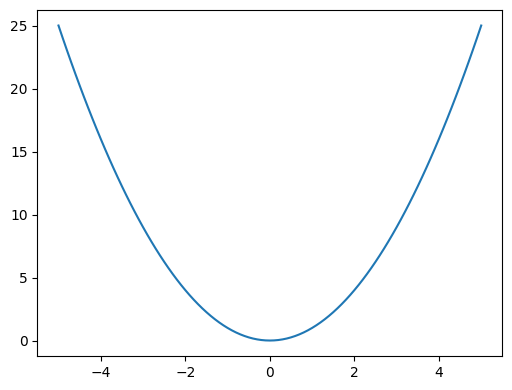

In [109]:
# Построим график, где кординаты по горизонтальной оси - это чилса из массива Х
# а координаты и вертикальной оси - числа из Х2
plt.plot(x, x2)

plt.show()

Добавим название графика

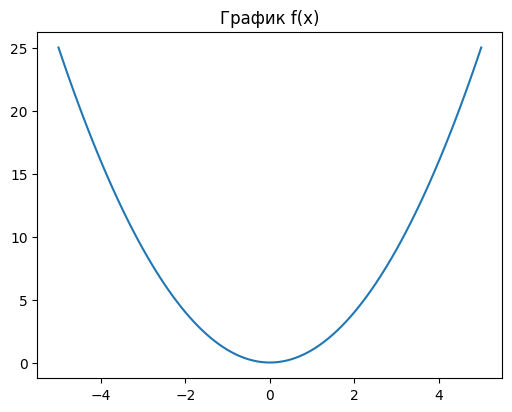

In [112]:
plt.plot(x, x2)
plt.title('График f(x)')

plt.show()

Изменим настройки для большей чёткости

In [116]:
# SVG (Scalable Vector Graphics) - Масштабиремая векторная графика
%config InlineBackend.figure_format = 'svg'

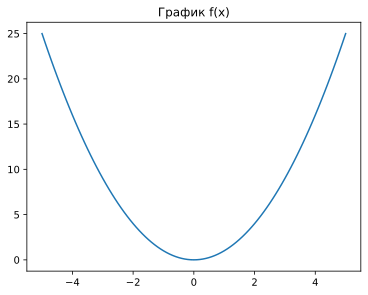

In [117]:
plt.plot(x, x2)
plt.title('График f(x)')

plt.show()

Изменение размера текста

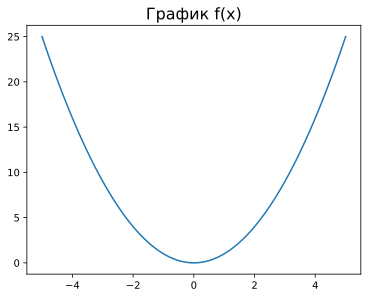

In [118]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16)

plt.show()

Изменим насыщенность текста

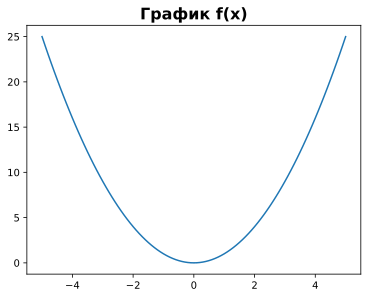

In [119]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold')
plt.show()

Изменим цвет для названия

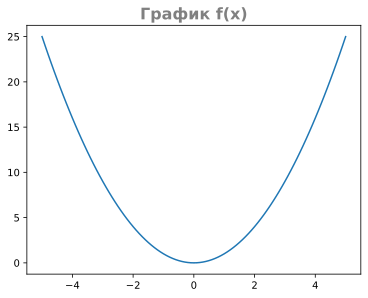

In [120]:
# Цвет можно указать из таблицы цветов HTML или в формате HEX (шестнадцатеричная система исчисления)
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold', color='#808080')

plt.show()

In [143]:
title_dict = {'fontsize': 20, 'fontweight': 'bold', 'color': '#808080', 'family': 'monospace'}

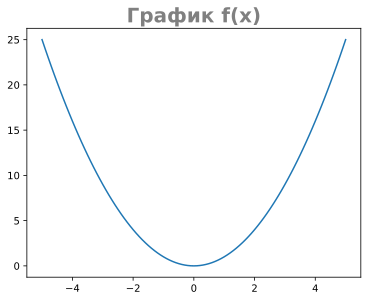

In [122]:
# fontdict - Этот аргумент может принять словарь содержащий необходиме данные для форматироания текста
plt.plot(x, x2)
plt.title('График f(x)', fontdict=title_dict)

plt.show()

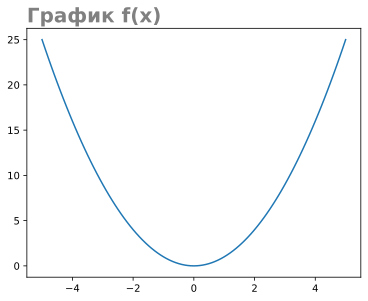

In [123]:
plt.plot(x, x2)
# loc - Расположение названия гафика (по умолчанию "center")
plt.title('График f(x)', fontdict=title_dict, loc='left')

plt.show()

Добавление названия осей

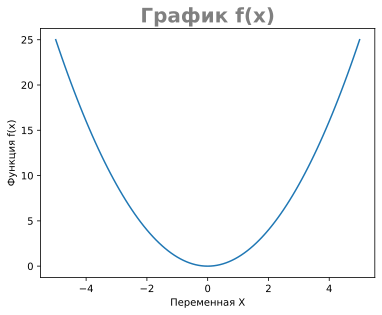

In [124]:
plt.plot(x, x2)

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х')
plt.ylabel('Функция f(x)')

plt.show()

Зададим параметры шрифта для названия осей

In [142]:
lable_dict = {'fontsize': '14', 'color': '#808080', 'family': 'monospace'}

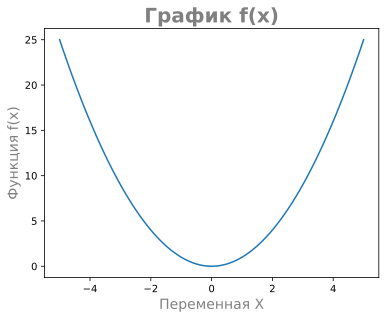

In [127]:
plt.plot(x, x2)

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.show()

Добавим график ещё одной функции

In [128]:
x3 = x**3
x3

array([-1.25000e+02, -1.17649e+02, -1.10592e+02, -1.03823e+02,
       -9.73360e+01, -9.11250e+01, -8.51840e+01, -7.95070e+01,
       -7.40880e+01, -6.89210e+01, -6.40000e+01, -5.93190e+01,
       -5.48720e+01, -5.06530e+01, -4.66560e+01, -4.28750e+01,
       -3.93040e+01, -3.59370e+01, -3.27680e+01, -2.97910e+01,
       -2.70000e+01, -2.43890e+01, -2.19520e+01, -1.96830e+01,
       -1.75760e+01, -1.56250e+01, -1.38240e+01, -1.21670e+01,
       -1.06480e+01, -9.26100e+00, -8.00000e+00, -6.85900e+00,
       -5.83200e+00, -4.91300e+00, -4.09600e+00, -3.37500e+00,
       -2.74400e+00, -2.19700e+00, -1.72800e+00, -1.33100e+00,
       -1.00000e+00, -7.29000e-01, -5.12000e-01, -3.43000e-01,
       -2.16000e-01, -1.25000e-01, -6.40000e-02, -2.70000e-02,
       -8.00000e-03, -1.00000e-03,  0.00000e+00,  1.00000e-03,
        8.00000e-03,  2.70000e-02,  6.40000e-02,  1.25000e-01,
        2.16000e-01,  3.43000e-01,  5.12000e-01,  7.29000e-01,
        1.00000e+00,  1.33100e+00,  1.72800e+00,  2.197

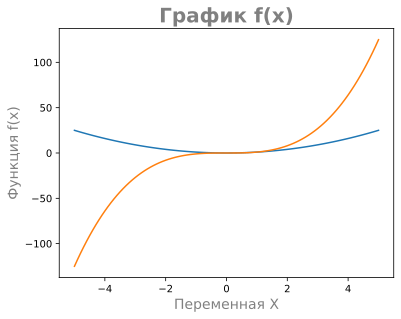

In [129]:
# Теперь график содержит две линии
plt.plot(x, x2)
plt.plot(x, x3)

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.show()

Масштаб горизонтальной и вертикальной оси сильно различается

### Ограничение осей

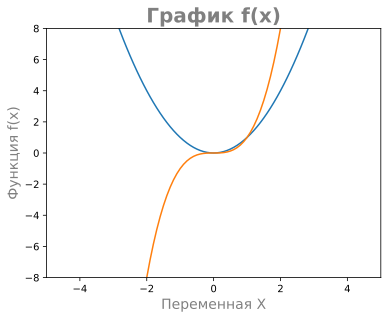

In [130]:
# plt.axis([min значение, max значение по горизонтальной оси, min, max по вертикальной оси])
plt.axis([-5, 5, -8, 8])
# Теперь график ограничен этими значениями

plt.plot(x, x2)
plt.plot(x, x3)

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.show()

### Добавление легенды

Легенда нужна когда на 1 графике имеется несколько линий

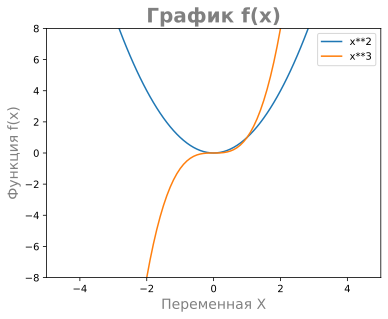

In [131]:
plt.axis([-5, 5, -8, 8])

plt.plot(x, x2)
plt.plot(x, x3)

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.legend(labels=['x**2', 'x**3'])

plt.show()

Данный способ не очень удобен так как можно ошибиться





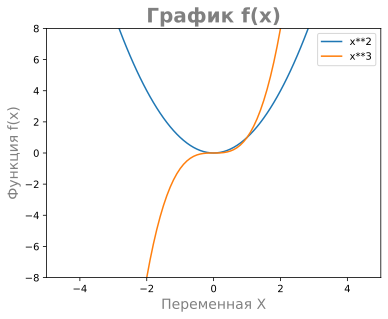

In [132]:
plt.axis([-5, 5, -8, 8])

# А аргументы lebel мы укажем сразу в функции plot 
plt.plot(x, x2, label='x**2')
plt.plot(x, x3, label='x**3')

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

# Прописывем legend без аргументов
plt.legend()

plt.show()

##### Оформление внешнего вида Легенды

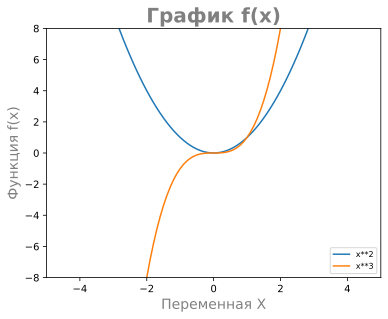

In [133]:
plt.axis([-5, 5, -8, 8])


plt.plot(x, x2, label='x**2')
plt.plot(x, x3, label='x**3')

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

# loc - Перемещение легенды
# fontsize - Размер шрифта
plt.legend(loc='lower right', fontsize=8)

plt.show()

In [140]:
# Либо можно воспользоваться словарём
legend_dict = {'family': 'monospace', 'size':10}

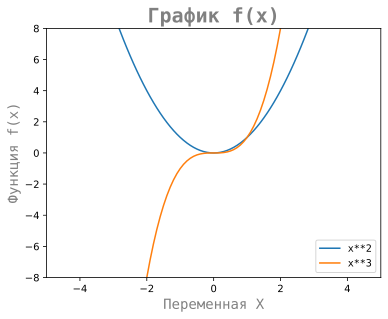

In [144]:
plt.axis([-5, 5, -8, 8])


plt.plot(x, x2, label='x**2')
plt.plot(x, x3, label='x**3')

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

# Изменение настроек легенды через словарь
plt.legend(loc='lower right', prop=legend_dict)

plt.show()

Замена цвета текста легенды



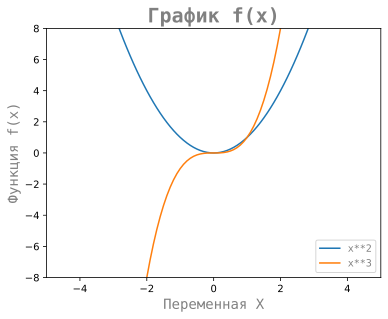

In [145]:
plt.axis([-5, 5, -8, 8])


plt.plot(x, x2, label='x**2')
plt.plot(x, x3, label='x**3')

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

legend = plt.legend(loc='lower right', prop=legend_dict)

# Используем функцию setp и будем отправлять в неё текст легенды, 
# полученный с помощью метода get_texts()
# color='grey' - Цвет определим как серый
plt.setp(legend.get_texts(), color='grey')

plt.show()

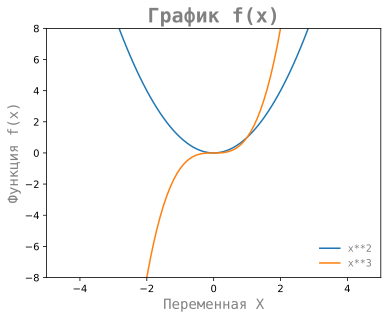

In [146]:
plt.axis([-5, 5, -8, 8])


plt.plot(x, x2, label='x**2')
plt.plot(x, x3, label='x**3')

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

# frameon=False - убираем рамку у легенды
legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)

plt.setp(legend.get_texts(), color='grey')

plt.show()

### Оформление линий и сетки графика

Оформление линий графика

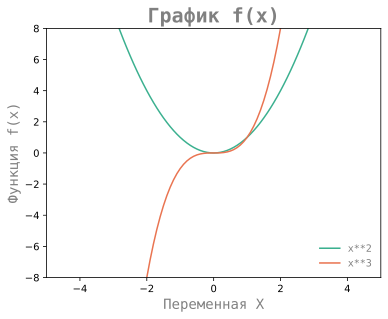

In [147]:
plt.axis([-5, 5, -8, 8])
# color - Задаём цвет линий
plt.plot(x, x2, label='x**2', color='#3bb08f')
plt.plot(x, x3, label='x**3', color='#e97451')

plt.title('График f(x)', fontdict=title_dict)
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)


legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

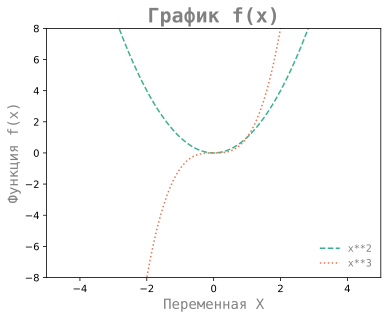

In [148]:
plt.axis([-5, 5, -8, 8])
# linestyle='dashed' - Задаём стиль линии графика (По умолчанию сплошная линия)
plt.plot(x, x2, label='x**2', color='#3bb08f', linestyle='dashed')
plt.plot(x, x3, label='x**3', color='#e97451', linestyle='dotted')

plt.title('График f(x)', fontdict=title_dict)
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)


legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

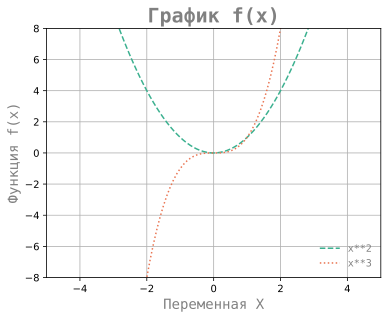

In [149]:
plt.axis([-5, 5, -8, 8])

plt.plot(x, x2, label='x**2', color='#3bb08f', linestyle='dashed')
plt.plot(x, x3, label='x**3', color='#e97451', linestyle='dotted')

plt.title('График f(x)', fontdict=title_dict)
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)
legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

# grid() - Наносим сетку на график
plt.grid()
plt.show()

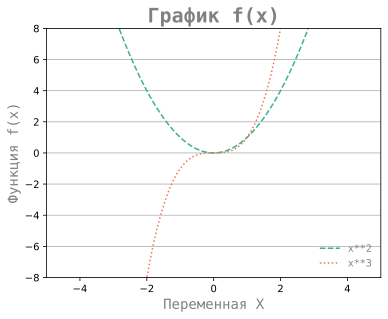

In [150]:
plt.axis([-5, 5, -8, 8])

plt.plot(x, x2, label='x**2', color='#3bb08f', linestyle='dashed')
plt.plot(x, x3, label='x**3', color='#e97451', linestyle='dotted')

plt.title('График f(x)', fontdict=title_dict)
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)
legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

# grid(axis='y') - Наносим сетку на график для оси y
plt.grid(axis='y')

plt.show()

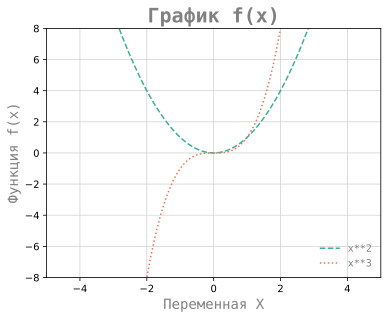

In [153]:
plt.axis([-5, 5, -8, 8])

plt.plot(x, x2, label='x**2', color='#3bb08f', linestyle='dashed')
plt.plot(x, x3, label='x**3', color='#e97451', linestyle='dotted')

plt.title('График f(x)', fontdict=title_dict)
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)
legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

# ghostwhite - призрачно-белый цвет
# grid(color='lightgrey') - Задаём цвет сетки
plt.grid(color='lightgrey')

plt.show()

-------------

# 3. Объекты библиотеки Matlplotlib

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Figure и axes - основыне объекты библиотеки Matplotlib. 

Figure (Определённое выделенное место, где может распологаться один или несколько графиков)

Объекты axes распологаются внутри figure

In [155]:
x = np.linspace(-5, 5, 101)
x2 = x**2
x3 = x**3

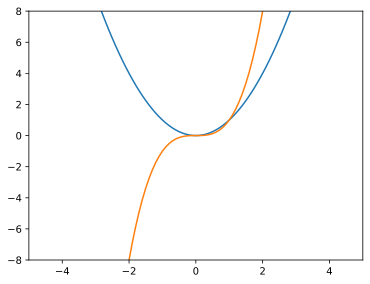

In [156]:
# Построение графика с помощью  структурного подхода (как обычно)
plt.axis([-5, 5, -8, 8])
plt.plot(x, x2)
plt.plot(x, x3)

plt.show()

Получен график, где показаны обе функции.

А если надо создать 2 графика или больше?
#### Объектно ориентированный подход

In [1]:
# subplots(nrows= строки, ncols=столбцы) - создаёт объект fig (фигура), а так же
# создаёт сетку для объектов

# В 1 строке и 1 столбце можно разместить 1 axis
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, x2)

plt.show()

NameError: name 'plt' is not defined

**Создание объектов figure и axes**

In [161]:
one, two = [1, 2]
print(one, two)

1 2


In [160]:
ax

array([<Axes: >, <Axes: >], dtype=object)

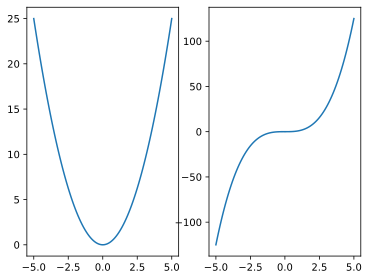

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=2)

# Записываем значения массива numpy в кортеж
ax1, ax2 = ax

# Для каждого объекта применяем метод Plot
ax1.plot(x, x2)
ax2.plot(x, x3)

plt.show()

## Расположение axes внутри объекта figure

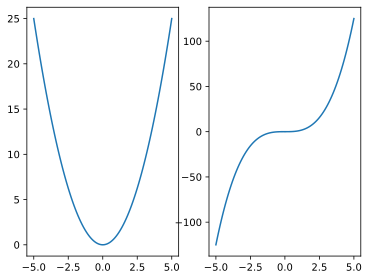

In [162]:
fig, ax = plt.subplots(nrows=1, ncols=2)

# flatten - распремление массива в одномерный
# Упростит получение объектов из массива
ax1, ax2 = ax.flatten()

ax1.plot(x, x2)
ax2.plot(x, x3)

plt.show()

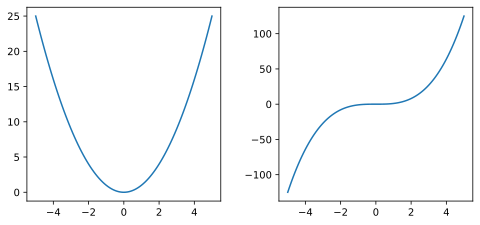

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x, x2)
ax2.plot(x, x3)

# Задаём значение ширины и высоты фигуры в дюймах
fig.set_size_inches(8, 3.5)

# Увеличение ширины фигуры 
# 0.3 - это не дюймы, а доля от среднего значения горизонтальных осей графиков
# wspace - начинаится с буквы W, так как это сокращение от width (Ширина) Отвечает за растояние между графиками по горизонатли
plt.subplots_adjust(wspace=0.3)

Расположим эти графики в два ряда

(2,)


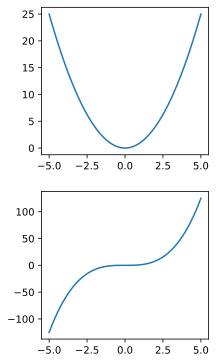

In [164]:
# Для этого зададим 2 строки и 1 столбец
fig, ax = plt.subplots(nrows=2, ncols=1)
print(ax.shape)
ax1, ax2 = ax.flatten()
ax1.plot(x, x2)
ax2.plot(x, x3)

fig.set_size_inches(3, 6)
# Установим растояние между графиками равное четверти их средней высоты
plt.subplots_adjust(hspace=0.25)

In [165]:
# Создадим 2 массива
y = np.sin(x)
z = np.cos(x)

In [170]:
one, two = [[1, 2] , [3, 4]]

In [173]:
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [174]:
ax.flatten()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

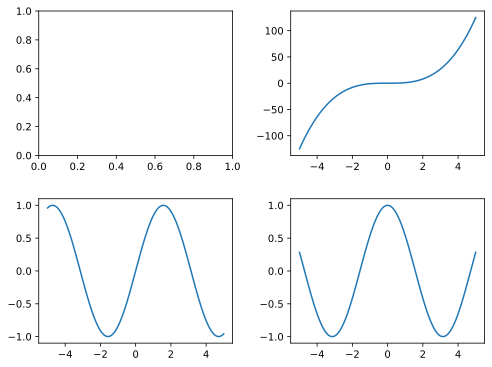

In [177]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

# ax1.plot(x, x2)
ax2.plot(x, x3)
ax3.plot(x, y)
ax4.plot(x, z)

fig.set_size_inches(8, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.30)

## Редактирование объекта axes

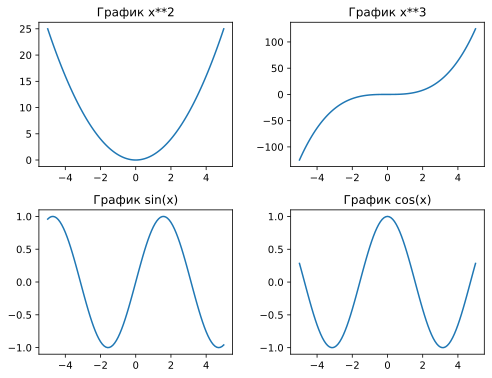

In [179]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

# set_title - Установим названия для графиков
ax1.plot(x, x2)
ax1.set_title('График х**2')

ax2.plot(x, x3)
ax2.set_title('График х**3')

ax3.plot(x, y)
ax3.set_title('График sin(x)')

ax4.plot(x, z)
ax4.set_title('График cos(x)')

fig.set_size_inches(8, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

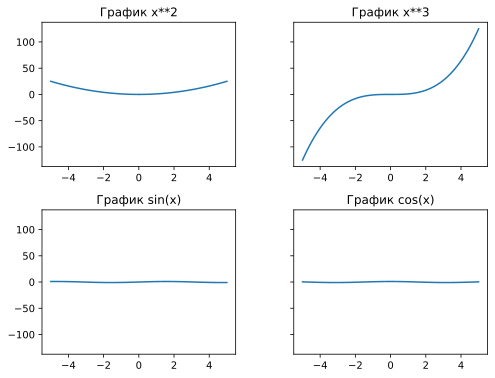

In [180]:
# sharey=True - Размах оси У стал одинаковый от -100 до 100
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True)
ax1, ax2, ax3, ax4 = ax.flatten()

# set_title - Установим названия для графиков
ax1.plot(x, x2)
ax1.set_title('График х**2')

ax2.plot(x, x3)
ax2.set_title('График х**3')

ax3.plot(x, y)
ax3.set_title('График sin(x)')

ax4.plot(x, z)
ax4.set_title('График cos(x)')

fig.set_size_inches(8, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.30)

Также границы осей можно установить индивидульно для каждого графика

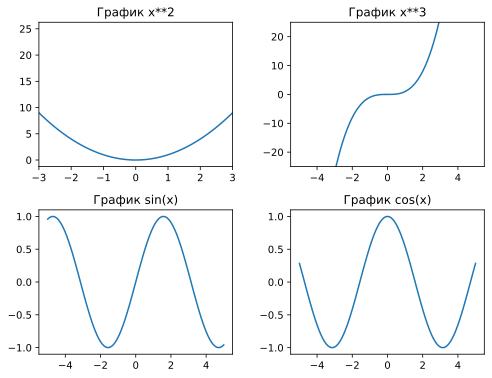

In [181]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(x, x2)
ax1.set_title('График х**2')
# Установили границы для оси Х в 1-ом объекте axis
ax1.set_xlim([-3, 3])

ax2.plot(x, x3)
ax2.set_title('График х**3')
# Установили границы для оси У в 2-ом объекте axis
ax2.set_ylim([-25, 25])

ax3.plot(x, y)
ax3.set_title('График sin(x)')

ax4.plot(x, z)
ax4.set_title('График cos(x)')

fig.set_size_inches(8, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.30)